## Autor:
Andrea Campillo Piqueras.
## Estudios:
Universidad Internacional de La Rioja.
Escuela Superior de Ingeniería y Tecnología.<br>
Trabajo Fin de Máster Universitario en Análisis y Visualización de Datos Masivos/ Visual Analytics and Big Data.
## Título:
PrediDia: Un Enfoque Predictivo para la Evaluación de la Diabetes.
## Repositorio:
https://github.com/AndreaCampillo/TFM_PrediDia
## Licencia:
MIT License Copyright (c) 2024 Andrea Campillo Piqueras.

## <center><H1>Support Vector Machine (SVM)</H1></center>

In [1]:
# Librerías utilizadas
import time
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from imblearn.metrics import specificity_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

# Dataset 2021

In [2]:
url = 'https://github.com/AndreaCampillo/TFM_PrediDia/raw/Datasets/2021DataSet_Diabeticos_NoDiabeticos_Depurado.csv'
dfDiabetes_load = pd.read_csv(url, sep=';')

In [3]:
#Clases antes de la normalización
dfDiabetes_load['SupGrPreDiabetes'].value_counts()

SupGrPreDiabetes
2    191862
1     37793
Name: count, dtype: int64

In [4]:
dfDiabetes_load['SupGrPreDiabetes'] = dfDiabetes_load['SupGrPreDiabetes'].replace({2: 0, 1: 1})

In [5]:
#Clases despues de la normalización
dfDiabetes_load['SupGrPreDiabetes'].value_counts()

SupGrPreDiabetes
0    191862
1     37793
Name: count, dtype: int64

In [6]:
dfDiabetes_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229655 entries, 0 to 229654
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Year                229655 non-null  int64
 1   CatBMI              229655 non-null  int64
 2   Stroke              229655 non-null  int64
 3   HeartDis            229655 non-null  int64
 4   PhysExer            229655 non-null  int64
 5   HealthIns           229655 non-null  int64
 6   NoMedCost           229655 non-null  int64
 7   GenHealth           229655 non-null  int64
 8   CogDiff             229655 non-null  int64
 9   Depression          229655 non-null  int64
 10  MentalHlth          229655 non-null  int64
 11  MentalState         229655 non-null  int64
 12  PhysHlth            229655 non-null  int64
 13  WalkDiff            229655 non-null  int64
 14  Gender              229655 non-null  int64
 15  AgeRange            229655 non-null  int64
 16  EdLevel             

In [7]:
dfDiabetes_load.head()

,Year,CatBMI,Stroke,HeartDis,PhysExer,HealthIns,NoMedCost,GenHealth,CogDiff,Depression,...,FruitCons,VegCons,FruitOrVegCon,FruitAndVegCon,MarijuanaCon,SleepHours,BrDiabetes,GrDiabetes,SupGrPreDiabetes,SupGrNoPreDiabetes
0,2021,1,2,2,2,1,2,2,2,2,...,1,1,1,1,9,99,3,3,0,2
1,2021,3,2,1,2,1,2,1,2,2,...,1,2,1,2,9,99,1,1,1,1
2,2021,4,2,2,1,1,2,1,2,2,...,1,1,1,1,9,99,1,1,1,1
3,2021,3,1,1,1,1,2,2,2,2,...,1,1,1,1,9,99,1,1,1,1
4,2021,2,2,2,2,1,2,1,2,2,...,2,2,2,2,9,99,3,3,0,2


In [8]:
# Incluye 25 características sin eliminar LungDiseases, VisionDiff, UrologyDZ,Stroke. Se comprobará el rendimiento con estás
# últimas y se tomará una decisión.
columns = ['CatBMI', 'Stroke', 'HeartDis', 'PhysExer', 'GenHealth', 
           'CogDiff', 'Depression', 'PhysHlth', 'WalkDiff','Gender', 
           'AgeRange', 'EdLevel', 'SocClass', 'UrologyDz','VisionDiff',
           'Asthma', 'LungDiseases','Arthritis', 'SmokerTrad', 'AlcDrinker', 
           'Race', 'LastMedChk', 'HighBP','HighChol', 'FruitAndVegCon',
           'SupGrPreDiabetes']
dfDiabetes = dfDiabetes_load[columns].copy()

In [9]:
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229655 entries, 0 to 229654
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   CatBMI            229655 non-null  int64
 1   Stroke            229655 non-null  int64
 2   HeartDis          229655 non-null  int64
 3   PhysExer          229655 non-null  int64
 4   GenHealth         229655 non-null  int64
 5   CogDiff           229655 non-null  int64
 6   Depression        229655 non-null  int64
 7   PhysHlth          229655 non-null  int64
 8   WalkDiff          229655 non-null  int64
 9   Gender            229655 non-null  int64
 10  AgeRange          229655 non-null  int64
 11  EdLevel           229655 non-null  int64
 12  SocClass          229655 non-null  int64
 13  UrologyDz         229655 non-null  int64
 14  VisionDiff        229655 non-null  int64
 15  Asthma            229655 non-null  int64
 16  LungDiseases      229655 non-null  int64
 17  Arthritis 

In [10]:
dfDiabetes.head()

,CatBMI,Stroke,HeartDis,PhysExer,GenHealth,CogDiff,Depression,PhysHlth,WalkDiff,Gender,...,LungDiseases,Arthritis,SmokerTrad,AlcDrinker,Race,LastMedChk,HighBP,HighChol,FruitAndVegCon,SupGrPreDiabetes
0,1,2,2,2,2,2,2,3,2,2,...,1,1,3,1,1,2,2,1,1,0
1,3,2,1,2,1,2,2,1,2,2,...,2,2,4,1,2,1,1,2,2,1
2,4,2,2,1,1,2,2,1,2,2,...,2,2,4,2,1,1,1,1,1,1
3,3,1,1,1,2,2,2,3,1,1,...,2,2,4,1,4,1,1,1,1,1
4,2,2,2,2,1,2,2,1,1,1,...,1,2,3,1,1,1,2,2,2,0


In [11]:
numClases = dfDiabetes['SupGrPreDiabetes'].value_counts()
numDiabeticos = numClases[1]
numNoDiabeticos = numClases[0]
print("Número de registros: ", len(dfDiabetes)) 
print("Número de dibéticos: ", numDiabeticos)
print("Número de no diabéticos: ", numNoDiabeticos)

Número de registros:  229655
Número de dibéticos:  37793
Número de no diabéticos:  191862


In [12]:
# Se obtienen los datasets de entrenamiento (train), validación (val) y pruebas (test)
train_set, test_set = train_test_split(dfDiabetes, test_size=0.4, random_state=14, shuffle=True, stratify=dfDiabetes['SupGrPreDiabetes'])
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=14, shuffle=True, stratify=test_set['SupGrPreDiabetes'])

X_train = train_set.drop('SupGrPreDiabetes', axis=1)
y_train = train_set['SupGrPreDiabetes'].copy()

X_val = val_set.drop('SupGrPreDiabetes', axis=1)
y_val = val_set['SupGrPreDiabetes'].copy()

X_test = test_set.drop('SupGrPreDiabetes', axis=1)
y_test = test_set['SupGrPreDiabetes'].copy()

In [13]:
print("Logintud del Training set:", len(train_set))
print("Logintud del Validation set:", len(val_set))
print("Logintud del Test set:", len(test_set))

Logintud del Training set: 137793
Logintud del Validation set: 45931
Logintud del Test set: 45931


In [14]:
# Obtención del modelo
from sklearn.svm import LinearSVC
start_time = time.time()
model = SVC(class_weight="balanced", random_state=14)
model.fit(X_train, y_train)
print("Tiempo en generación del modelo:", round(time.time()-start_time,3), " sg.")

Tiempo en generación del modelo: 1671.632  sg.


In [15]:
#Predecimos con el el conjunto de validación
y_pred = model.predict(X_val)

In [16]:
print("F1 score: {:.3f}".format(f1_score(y_val, y_pred, average='weighted')))

F1 score: 0.744


In [17]:
# Se reproduce el proceso pero eliminando las caracteristcas las características LungDiseases, VisionDiff, UrologyDZ,Stroke
columns = ['CatBMI','HeartDis','PhysExer','GenHealth','CogDiff',
           'Depression', 'PhysHlth', 'WalkDiff','Gender','AgeRange',
           'EdLevel', 'SocClass','Asthma', 'Arthritis', 'SmokerTrad',
           'AlcDrinker','Race', 'LastMedChk', 'HighBP','HighChol',
           'FruitAndVegCon']
X_train_reduced = X_train[columns].copy()
X_val_reduced = X_val[columns].copy()

In [18]:
X_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137793 entries, 185844 to 162809
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   CatBMI          137793 non-null  int64
 1   HeartDis        137793 non-null  int64
 2   PhysExer        137793 non-null  int64
 3   GenHealth       137793 non-null  int64
 4   CogDiff         137793 non-null  int64
 5   Depression      137793 non-null  int64
 6   PhysHlth        137793 non-null  int64
 7   WalkDiff        137793 non-null  int64
 8   Gender          137793 non-null  int64
 9   AgeRange        137793 non-null  int64
 10  EdLevel         137793 non-null  int64
 11  SocClass        137793 non-null  int64
 12  Asthma          137793 non-null  int64
 13  Arthritis       137793 non-null  int64
 14  SmokerTrad      137793 non-null  int64
 15  AlcDrinker      137793 non-null  int64
 16  Race            137793 non-null  int64
 17  LastMedChk      137793 non-null  int64
 18  High

In [19]:
start_time = time.time()
model = SVC(kernel="rbf", class_weight="balanced")
model.fit(X_train_reduced, y_train)
print("Tiempo en generación del modelo:", round(time.time()-start_time,3), " sg.")

Tiempo en generación del modelo: 1597.213  sg.


In [20]:
# Predecimos con el conjunto de datos de validación
y_pred = model.predict(X_val_reduced)

In [21]:
print("F1 score: {:.3f}".format(f1_score(y_val, y_pred, average='weighted')))

F1 score: 0.740


In [22]:
# Se comprueba con los datos de test
X_test_reduced = X_test[columns].copy()
y_pred = model.predict(X_test_reduced)

In [23]:
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred, average='weighted')))

F1 score: 0.736


In [24]:
# Obtención de métricas
# Se reproduce el proceso pero eliminando las caracteristcas las características LungDiseases, VisionDiff, UrologyDZ,Stroke
columns = ['CatBMI','HeartDis','PhysExer','GenHealth','CogDiff',
           'Depression', 'PhysHlth', 'WalkDiff','Gender','AgeRange',
           'EdLevel', 'SocClass','Asthma', 'Arthritis', 'SmokerTrad',
           'AlcDrinker','Race', 'LastMedChk', 'HighBP','HighChol', 'FruitAndVegCon',
           'SupGrPreDiabetes']
dfDiabetes = dfDiabetes_load[columns].copy()

In [25]:
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229655 entries, 0 to 229654
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   CatBMI            229655 non-null  int64
 1   HeartDis          229655 non-null  int64
 2   PhysExer          229655 non-null  int64
 3   GenHealth         229655 non-null  int64
 4   CogDiff           229655 non-null  int64
 5   Depression        229655 non-null  int64
 6   PhysHlth          229655 non-null  int64
 7   WalkDiff          229655 non-null  int64
 8   Gender            229655 non-null  int64
 9   AgeRange          229655 non-null  int64
 10  EdLevel           229655 non-null  int64
 11  SocClass          229655 non-null  int64
 12  Asthma            229655 non-null  int64
 13  Arthritis         229655 non-null  int64
 14  SmokerTrad        229655 non-null  int64
 15  AlcDrinker        229655 non-null  int64
 16  Race              229655 non-null  int64
 17  LastMedChk

In [26]:
dfDiabetes.head()

,CatBMI,HeartDis,PhysExer,GenHealth,CogDiff,Depression,PhysHlth,WalkDiff,Gender,AgeRange,...,Asthma,Arthritis,SmokerTrad,AlcDrinker,Race,LastMedChk,HighBP,HighChol,FruitAndVegCon,SupGrPreDiabetes
0,1,2,2,2,2,2,3,2,2,6,...,2,1,3,1,1,2,2,1,1,0
1,3,1,2,1,2,2,1,2,2,6,...,1,2,4,1,2,1,1,2,2,1
2,4,2,1,1,2,2,1,2,2,5,...,1,2,4,2,1,1,1,1,1,1
3,3,1,1,2,2,2,3,1,1,6,...,1,2,4,1,4,1,1,1,1,1
4,2,2,2,1,2,2,1,1,1,6,...,1,2,3,1,1,1,2,2,2,0


In [27]:
# Se obtienen los datasets de entrenamiento (train), validación (val) y pruebas (test)
train_set, test_set = train_test_split(dfDiabetes, test_size=0.4, random_state=14, shuffle=True, stratify=dfDiabetes['SupGrPreDiabetes'])
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=14, shuffle=True, stratify=test_set['SupGrPreDiabetes'])

X_train = train_set.drop('SupGrPreDiabetes', axis=1)
y_train = train_set['SupGrPreDiabetes'].copy()

X_val = val_set.drop('SupGrPreDiabetes', axis=1)
y_val = val_set['SupGrPreDiabetes'].copy()

X_test = test_set.drop('SupGrPreDiabetes', axis=1)
y_test = test_set['SupGrPreDiabetes'].copy()

In [28]:
print("Logintud del Training set:", len(train_set))
print("Logintud del Validation set:", len(val_set))
print("Logintud del Test set:", len(test_set))

Logintud del Training set: 137793
Logintud del Validation set: 45931
Logintud del Test set: 45931


In [29]:
# Obtención del modelo
start_time = time.time()
model = SVC(kernel="rbf", class_weight="balanced")
#model = SVC(kernel="linear", C=50)
#model = SVC(kernel="linear", C=1)
#model = LinearSVC(C=20, loss="hinge", random_state=42, max_iter=100000, dual=True)
#model = SVC(kernel="poly", degree=3, coef0=10, C=20)
#model = SVC(kernel="poly", degree=3, coef0=10, C=40)
#model = SVC(kernel="rbf", gamma=0.5, C=1000)
model.fit(X_train, y_train)
print("Tiempo en generación del modelo:", round(time.time()-start_time,3), " sg.")

Tiempo en generación del modelo: 1601.003  sg.


In [30]:
# Se predice con el dataset de validación
y_pred = model.predict(X_val)

In [31]:
print("F1 score: {:.3f}".format(f1_score(y_val, y_pred, average='weighted')))

F1 score: 0.740


In [32]:
# Se comprueba con el dataset de prueba
y_pred = model.predict(X_test)

F1 score: 0.736
Precisión (Precision): 0.838
Sensibilidad (Recall): 0.698
Exactitud (Accuracy): 0.698
Especificidad (Specificity): 0.683
AUC-ROC: 0.730
Matriz de confusión (Confusion Matrix):


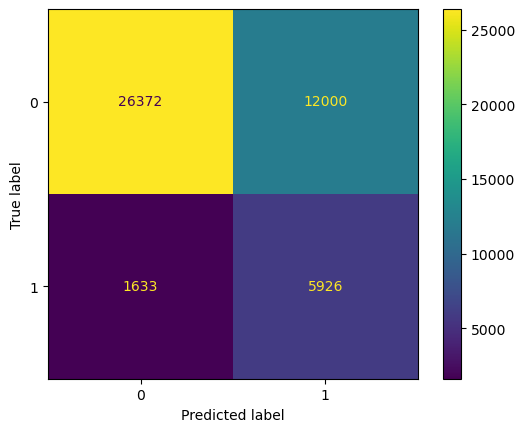

In [33]:
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred, average='weighted')))
print("Precisión (Precision): {:.3f}".format(precision_score(y_test, y_pred, average='weighted')))
print("Sensibilidad (Recall): {:.3f}".format(recall_score(y_test, y_pred, average='weighted')))
print("Exactitud (Accuracy): {:.3f}".format(accuracy_score(y_test, y_pred)))
print("Especificidad (Specificity): {:.3f}".format(specificity_score(y_test, y_pred)))
print("AUC-ROC: {:.3f}".format(roc_auc_score(y_test, y_pred)))
print("Matriz de confusión (Confusion Matrix):")
ConfusionMatrixDisplay.from_estimator(model,X_val,y_val)

# SMOTE

In [36]:
url = 'https://github.com/AndreaCampillo/TFM_PrediDia/raw/Datasets/2021DataSet_Diabeticos_NoDiabeticos_Depurado.csv'
dfDiabetes_load = pd.read_csv(url, sep=';')

In [37]:
#Clases antes de la normalización
dfDiabetes_load['SupGrPreDiabetes'].value_counts()

SupGrPreDiabetes
2    191862
1     37793
Name: count, dtype: int64

In [38]:
dfDiabetes_load['SupGrPreDiabetes'] = dfDiabetes_load['SupGrPreDiabetes'].replace({2: 0, 1: 1})

In [39]:
#Clases despues de la normalización
dfDiabetes_load['SupGrPreDiabetes'].value_counts()

SupGrPreDiabetes
0    191862
1     37793
Name: count, dtype: int64

In [40]:
dfDiabetes_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229655 entries, 0 to 229654
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Year                229655 non-null  int64
 1   CatBMI              229655 non-null  int64
 2   Stroke              229655 non-null  int64
 3   HeartDis            229655 non-null  int64
 4   PhysExer            229655 non-null  int64
 5   HealthIns           229655 non-null  int64
 6   NoMedCost           229655 non-null  int64
 7   GenHealth           229655 non-null  int64
 8   CogDiff             229655 non-null  int64
 9   Depression          229655 non-null  int64
 10  MentalHlth          229655 non-null  int64
 11  MentalState         229655 non-null  int64
 12  PhysHlth            229655 non-null  int64
 13  WalkDiff            229655 non-null  int64
 14  Gender              229655 non-null  int64
 15  AgeRange            229655 non-null  int64
 16  EdLevel             

In [41]:
print(dfDiabetes_load.columns)

Index(['Year', 'CatBMI', 'Stroke', 'HeartDis', 'PhysExer', 'HealthIns',
       'NoMedCost', 'GenHealth', 'CogDiff', 'Depression', 'MentalHlth',
       'MentalState', 'PhysHlth', 'WalkDiff', 'Gender', 'AgeRange', 'EdLevel',
       'AnnIncome', 'SocClass', 'UrologyDz', 'VisionDiff', 'Asthma',
       'LungDiseases', 'Arthritis', 'SmokerTrad', 'ECigSmok', 'AlcDrinker',
       'Race', 'MaritalSt', 'LastMedChk', 'Awareness', 'FootIrrita',
       'FecFootIrrita', 'HighBP', 'HighChol', 'FruitCons', 'VegCons',
       'FruitOrVegCon', 'FruitAndVegCon', 'MarijuanaCon', 'SleepHours',
       'BrDiabetes', 'GrDiabetes', 'SupGrPreDiabetes', 'SupGrNoPreDiabetes'],
      dtype='object')


In [42]:
# Se seleccionan la 21 características que fueron óptimas
# Se reproduce el proceso pero eliminando las caracteristcas las características LungDiseases, VisionDiff, UrologyDZ,Stroke
columns = ['CatBMI','HeartDis','PhysExer','GenHealth','CogDiff',
           'Depression', 'PhysHlth', 'WalkDiff','Gender','AgeRange',
           'EdLevel', 'SocClass','Asthma', 'Arthritis', 'SmokerTrad',
           'AlcDrinker','Race', 'LastMedChk', 'HighBP','HighChol', 'FruitAndVegCon',
           'SupGrPreDiabetes']
dfDiabetes = dfDiabetes_load[columns].copy()

In [43]:
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229655 entries, 0 to 229654
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   CatBMI            229655 non-null  int64
 1   HeartDis          229655 non-null  int64
 2   PhysExer          229655 non-null  int64
 3   GenHealth         229655 non-null  int64
 4   CogDiff           229655 non-null  int64
 5   Depression        229655 non-null  int64
 6   PhysHlth          229655 non-null  int64
 7   WalkDiff          229655 non-null  int64
 8   Gender            229655 non-null  int64
 9   AgeRange          229655 non-null  int64
 10  EdLevel           229655 non-null  int64
 11  SocClass          229655 non-null  int64
 12  Asthma            229655 non-null  int64
 13  Arthritis         229655 non-null  int64
 14  SmokerTrad        229655 non-null  int64
 15  AlcDrinker        229655 non-null  int64
 16  Race              229655 non-null  int64
 17  LastMedChk

In [44]:
# Se obtienen los datasets de entrenamiento (train), validación (val) y pruebas (test)
train_set, test_set = train_test_split(dfDiabetes, test_size=0.4, random_state=14, shuffle=True, stratify=dfDiabetes['SupGrPreDiabetes'])
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=14, shuffle=True, stratify=test_set['SupGrPreDiabetes'])

X_train = train_set.drop('SupGrPreDiabetes', axis=1)
y_train = train_set['SupGrPreDiabetes'].copy()

X_val = val_set.drop('SupGrPreDiabetes', axis=1)
y_val = val_set['SupGrPreDiabetes'].copy()

X_test = test_set.drop('SupGrPreDiabetes', axis=1)
y_test = test_set['SupGrPreDiabetes'].copy()

In [45]:
y_val.value_counts()

SupGrPreDiabetes
0    38372
1     7559
Name: count, dtype: int64

In [46]:
print("Logintud del Training set:", len(train_set))
print("Logintud del Validation set:", len(val_set))
print("Logintud del Test set:", len(test_set))

Logintud del Training set: 137793
Logintud del Validation set: 45931
Logintud del Test set: 45931


In [47]:
# Obtención de datos de entrenamiento con SMOTE para balanceamiento de los datos
smote = SMOTE(sampling_strategy='auto', random_state=14)  
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [48]:
y_train_smote.value_counts()

SupGrPreDiabetes
0    115117
1    115117
Name: count, dtype: int64

In [49]:
# Se eliminad el hiperparámetro class_weight='balanced', por haber utilizado SMOTE
start_time = time.time()
model = SVC(kernel="rbf")
model.fit(X_train_smote, y_train_smote)
print("Tiempo en generación del modelo:", round(time.time()-start_time,3), " sg.")

Tiempo en generación del modelo: 2739.231  sg.


In [50]:
#Predecimos con el el conjunto de validación
y_pred = model.predict(X_val)

In [51]:
print("F1 score: {:.3f}".format(f1_score(y_val, y_pred, average='weighted')))

F1 score: 0.752


In [52]:
#Predecimos con el conjunto de test
y_pred = model.predict(X_test)

In [53]:
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred, average='weighted')))
# Se obtiene un F1 score esperado para el conjunto de test

F1 score: 0.748


F1 score: 0.748
Precisión (Precision): 0.827
Sensibilidad (Recall): 0.714
Exactitud (Accuracy): 0.714
Especificidad (Specificity): 0.715
AUC-ROC: 0.711
Matriz de confusión (Confusion Matrix):


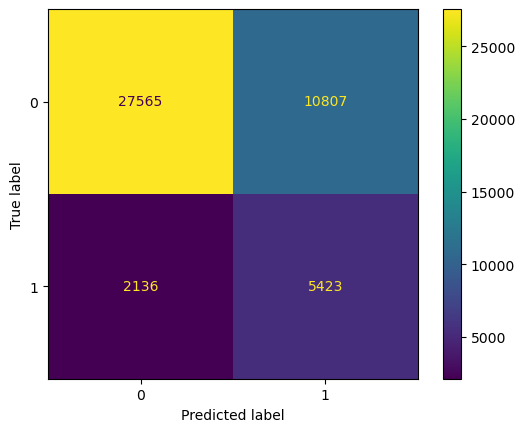

In [54]:
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred, average='weighted')))
print("Precisión (Precision): {:.3f}".format(precision_score(y_test, y_pred, average='weighted')))
print("Sensibilidad (Recall): {:.3f}".format(recall_score(y_test, y_pred, average='weighted')))
print("Exactitud (Accuracy): {:.3f}".format(accuracy_score(y_test, y_pred)))
print("Especificidad (Specificity): {:.3f}".format(specificity_score(y_test, y_pred)))
print("AUC-ROC: {:.3f}".format(roc_auc_score(y_test, y_pred)))
print("Matriz de confusión (Confusion Matrix):")
ConfusionMatrixDisplay.from_estimator(model,X_val,y_val)

# Dataset 2021_22
Se realiza el mismo test con los datos unificados de 2021 y 2022, por ese motivo se eliminan las caracteríticas HighBP, HighChol, FruitAndVegCon por no estar presentes en el dataset del 2022 

In [57]:
url = 'https://github.com/AndreaCampillo/TFM_PrediDia/raw/Datasets/2021_22DataSet_Diabeticos_NoDiabeticos_Depurado.csv'
dfDiabetes_load = pd.read_csv(url, sep=';')

In [58]:
#Clases antes de la normalización
dfDiabetes_load['SupGrPreDiabetes'].value_counts()

SupGrPreDiabetes
2    422532
1     81060
Name: count, dtype: int64

In [59]:
dfDiabetes_load['SupGrPreDiabetes'] = dfDiabetes_load['SupGrPreDiabetes'].replace({2: 0, 1: 1})

In [60]:
#Clases despues de la normalización
dfDiabetes_load['SupGrPreDiabetes'].value_counts()

SupGrPreDiabetes
0    422532
1     81060
Name: count, dtype: int64

In [61]:
dfDiabetes_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503592 entries, 0 to 503591
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Year                503592 non-null  int64
 1   CatBMI              503592 non-null  int64
 2   Stroke              503592 non-null  int64
 3   HeartDis            503592 non-null  int64
 4   PhysExer            503592 non-null  int64
 5   HealthIns           503592 non-null  int64
 6   NoMedCost           503592 non-null  int64
 7   GenHealth           503592 non-null  int64
 8   CogDiff             503592 non-null  int64
 9   Depression          503592 non-null  int64
 10  MentalHlth          503592 non-null  int64
 11  MentalState         503592 non-null  int64
 12  PhysHlth            503592 non-null  int64
 13  WalkDiff            503592 non-null  int64
 14  Gender              503592 non-null  int64
 15  AgeRange            503592 non-null  int64
 16  EdLevel             

In [62]:
print(dfDiabetes_load.columns)

Index(['Year', 'CatBMI', 'Stroke', 'HeartDis', 'PhysExer', 'HealthIns',
       'NoMedCost', 'GenHealth', 'CogDiff', 'Depression', 'MentalHlth',
       'MentalState', 'PhysHlth', 'WalkDiff', 'Gender', 'AgeRange', 'EdLevel',
       'AnnIncome', 'SocClass', 'UrologyDz', 'VisionDiff', 'Asthma',
       'LungDiseases', 'Arthritis', 'SmokerTrad', 'ECigSmok', 'AlcDrinker',
       'Race', 'MaritalSt', 'LastMedChk', 'Awareness', 'FootIrrita',
       'FecFootIrrita', 'HighBP', 'HighChol', 'FruitCons', 'VegCons',
       'FruitOrVegCon', 'FruitAndVegCon', 'MarijuanaCon', 'SleepHours',
       'BrDiabetes', 'GrDiabetes', 'SupGrPreDiabetes', 'SupGrNoPreDiabetes'],
      dtype='object')


In [63]:
dfDiabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229655 entries, 0 to 229654
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   CatBMI            229655 non-null  int64
 1   HeartDis          229655 non-null  int64
 2   PhysExer          229655 non-null  int64
 3   GenHealth         229655 non-null  int64
 4   CogDiff           229655 non-null  int64
 5   Depression        229655 non-null  int64
 6   PhysHlth          229655 non-null  int64
 7   WalkDiff          229655 non-null  int64
 8   Gender            229655 non-null  int64
 9   AgeRange          229655 non-null  int64
 10  EdLevel           229655 non-null  int64
 11  SocClass          229655 non-null  int64
 12  Asthma            229655 non-null  int64
 13  Arthritis         229655 non-null  int64
 14  SmokerTrad        229655 non-null  int64
 15  AlcDrinker        229655 non-null  int64
 16  Race              229655 non-null  int64
 17  LastMedChk

In [64]:
# Se reproduce el proceso con las características seleccionadas y comunes al 2021 y 2022
columns = ['CatBMI','HeartDis','PhysExer','GenHealth','CogDiff',
           'Depression', 'PhysHlth', 'WalkDiff','Gender','AgeRange',
           'EdLevel', 'SocClass','Asthma', 'Arthritis', 'SmokerTrad',
           'AlcDrinker','Race', 'LastMedChk','SupGrPreDiabetes']
dfDiabetes = dfDiabetes_load[columns].copy()

In [65]:
numClases = dfDiabetes['SupGrPreDiabetes'].value_counts()
numDiabeticos = numClases[1]
numNoDiabeticos = numClases[0]
print("Número de registros: ", len(dfDiabetes)) 
print("Número de dibéticos: ", numDiabeticos)
print("Número de no diabéticos: ", numNoDiabeticos)

Número de registros:  503592
Número de dibéticos:  81060
Número de no diabéticos:  422532


In [66]:
# Se obtienen los datasets de entrenamiento (train), validación (val) y pruebas (test)
train_set, test_set = train_test_split(dfDiabetes, test_size=0.4, random_state=14, shuffle=True, stratify=dfDiabetes['SupGrPreDiabetes'])
val_set, test_set = train_test_split(test_set, test_size=0.5, random_state=14, shuffle=True, stratify=test_set['SupGrPreDiabetes'])

X_train = train_set.drop('SupGrPreDiabetes', axis=1)
y_train = train_set['SupGrPreDiabetes'].copy()

X_val = val_set.drop('SupGrPreDiabetes', axis=1)
y_val = val_set['SupGrPreDiabetes'].copy()

X_test = test_set.drop('SupGrPreDiabetes', axis=1)
y_test = test_set['SupGrPreDiabetes'].copy()

In [67]:
print("Logintud del Training set:", len(train_set))
print("Logintud del Validation set:", len(val_set))
print("Logintud del Test set:", len(test_set))

Logintud del Training set: 302155
Logintud del Validation set: 100718
Logintud del Test set: 100719


In [68]:
# Obtención del modelo
start_time = time.time()
model = SVC(kernel="rbf", class_weight="balanced")
model.fit(X_train, y_train)
print("Tiempo en generación del modelo:", round(time.time()-start_time,3), " sg.")

Tiempo en generación del modelo: 7738.915  sg.


In [69]:
# Se predice con el dataset de validación
y_pred = model.predict(X_val)

In [70]:
print("F1 score: {:.3f}".format(f1_score(y_val, y_pred, average='weighted')))

F1 score: 0.727


In [71]:
# Se comprueba con el dataset de prueba
y_pred = model.predict(X_test)

F1 score: 0.729
Precisión (Precision): 0.839
Sensibilidad (Recall): 0.688
Exactitud (Accuracy): 0.688
Especificidad (Specificity): 0.671
AUC-ROC: 0.724
Matriz de confusión (Confusion Matrix):


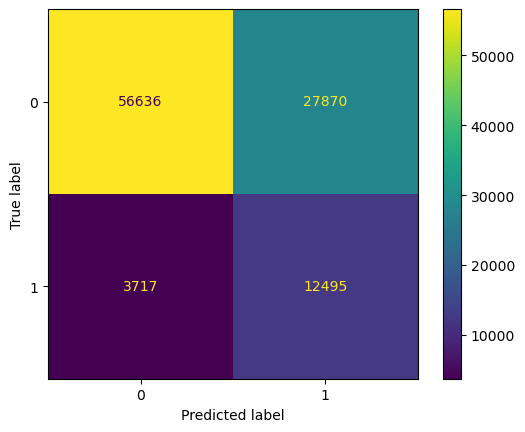

In [72]:
print("F1 score: {:.3f}".format(f1_score(y_test, y_pred, average='weighted')))
print("Precisión (Precision): {:.3f}".format(precision_score(y_test, y_pred, average='weighted')))
print("Sensibilidad (Recall): {:.3f}".format(recall_score(y_test, y_pred, average='weighted')))
print("Exactitud (Accuracy): {:.3f}".format(accuracy_score(y_test, y_pred)))
print("Especificidad (Specificity): {:.3f}".format(specificity_score(y_test, y_pred)))
print("AUC-ROC: {:.3f}".format(roc_auc_score(y_test, y_pred)))
print("Matriz de confusión (Confusion Matrix):")
ConfusionMatrixDisplay.from_estimator(model,X_val,y_val)